<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-curve-A.I-solutions-internship/blob/main/Football_Match_Probability_Prediction_DEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
train_file_stream=pd.read_csv("/content/drive/MyDrive/football-match-probability-prediction/train.csv",sep=',',low_memory=False)
test_file_stream=pd.read_csv("/content/drive/MyDrive/football-match-probability-prediction/test.csv",sep=',',low_memory=False)

In [49]:
train_file_stream

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,18030016,draw,Zamora Fútbol Club,Hermanos Colmenares,2021-04-30 23:00:00,Primera Division,800,False,7708122.0,37564088.0,...,800.0,800.0,1101.0,1101.0,803.0,803.0,803.0,803.0,803.0,803.0
110934,18030096,away,Royal Pari,Oriente Petrolero,2021-04-30 23:00:00,Liga De Futbol Prof,1098,False,465833.0,16488543.0,...,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0,1098.0
110935,17715497,draw,São Bernardo,Água Santa,2021-04-30 23:00:00,Paulista A2,1314,False,8416491.0,528562.0,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
110936,17944153,away,Everton,La Serena,2021-05-01 00:00:00,Primera Division,663,False,6973085.0,471757.0,...,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0,663.0


In [50]:
test_file_stream

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,team home,team away,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,team home,team away,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,21036670.0,1553238.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,3618158.0,37400444.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72706,18450246,team home,team away,2021-11-30 22:00:00,Segunda Division,776,False,185004.0,37604899.0,2021-11-24 20:15:00,...,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0
72707,18164889,team home,team away,2021-11-30 22:15:00,Superliga,636,False,212417.0,37600717.0,2021-11-25 00:30:00,...,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0
72708,18449018,team home,team away,2021-11-30 22:30:00,Friendly International Women,1363,False,37429080.0,37428117.0,2021-10-23 21:00:00,...,1363.0,1363.0,1126.0,1126.0,1126.0,1126.0,1126.0,1126.0,1363.0,1363.0
72709,17958831,team home,team away,2021-11-30 23:00:00,Serie A,648,False,459064.0,526182.0,2021-11-27 20:00:00,...,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0,648.0


In [52]:
train_file_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: float64(162), int64(2), object(26)
memory usage: 160.8+ MB


In [53]:
train_file_stream.columns.values 

array(['id', 'target', 'home_team_name', 'away_team_name', 'match_date',
       'league_name', 'league_id', 'is_cup', 'home_team_coach_id',
       'away_team_coach_id', 'home_team_history_match_date_1',
       'home_team_history_match_date_2', 'home_team_history_match_date_3',
       'home_team_history_match_date_4', 'home_team_history_match_date_5',
       'home_team_history_match_date_6', 'home_team_history_match_date_7',
       'home_team_history_match_date_8', 'home_team_history_match_date_9',
       'home_team_history_match_date_10',
       'home_team_history_is_play_home_1',
       'home_team_history_is_play_home_2',
       'home_team_history_is_play_home_3',
       'home_team_history_is_play_home_4',
       'home_team_history_is_play_home_5',
       'home_team_history_is_play_home_6',
       'home_team_history_is_play_home_7',
       'home_team_history_is_play_home_8',
       'home_team_history_is_play_home_9',
       'home_team_history_is_play_home_10', 'home_team_history_is_cu

In [7]:
train_file_stream.describe()

,id,league_id,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
count,1.109380e+05,110938.000000,8.921700e+04,8.912300e+04,109779.000000,108487.000000,107165.000000,105837.000000,104461.000000,103042.000000,...,109712.000000,108345.000000,106904.000000,105422.000000,103938.000000,102512.000000,101071.000000,99643.000000,98176.000000,96722.000000
mean,1.519875e+07,910.457012,1.287134e+07,1.291552e+07,0.306944,0.567801,0.466141,0.519469,0.487857,0.507288,...,901.986200,894.389137,886.368012,878.243611,869.450297,861.901455,853.435338,844.673223,837.678200,829.177374
std,2.536393e+06,549.120985,1.578479e+07,1.580344e+07,0.461228,0.495384,0.498855,0.499623,0.499855,0.499949,...,545.826707,542.247411,538.497274,534.864981,531.170701,527.338931,524.217968,520.954647,517.647869,514.900676
min,1.142829e+07,2.000000,2.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.200038e+07,444.000000,4.596120e+05,4.595650e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,438.000000,432.000000,426.000000,420.000000,417.000000,408.000000,399.000000,391.500000,387.000000,387.000000
50%,1.675988e+07,947.000000,1.552728e+06,1.552806e+06,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,944.000000,935.000000,906.500000,899.000000,884.000000,881.000000,860.000000,830.000000,821.000000,806.000000
75%,1.724230e+07,1293.000000,3.243116e+07,3.279539e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1286.000000,1283.000000,1279.000000,1274.000000,1270.000000,1267.000000,1265.000000,1263.000000,1261.000000,1255.000000
max,1.805384e+07,2039.000000,3.756849e+07,3.756847e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2028.000000,2025.000000


In [54]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train_file_stream = train_file_stream.select_dtypes(include=numerics)
len(numeric_train_file_stream.columns)

164

In [55]:
train_file_stream.isna()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
train_file_stream.isna().sum()

id                                    0
target                                0
home_team_name                        1
away_team_name                        1
match_date                            0
                                  ...  
away_team_history_league_id_6      8426
away_team_history_league_id_7      9867
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
Length: 190, dtype: int64

In [57]:
missing_percentages = train_file_stream.isna().sum().sort_values(ascending=False) / len(train_file_stream)
missing_percentages

away_team_history_coach_10    0.244542
home_team_history_coach_10    0.240251
away_team_history_coach_9     0.235717
home_team_history_coach_9     0.231958
away_team_history_coach_8     0.227325
                                ...   
league_name                   0.000009
target                        0.000000
match_date                    0.000000
league_id                     0.000000
id                            0.000000
Length: 190, dtype: float64

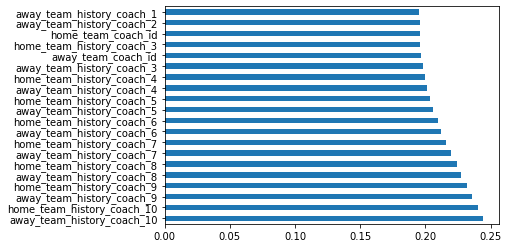

In [58]:
missing_percentages[:20].plot(kind='barh')


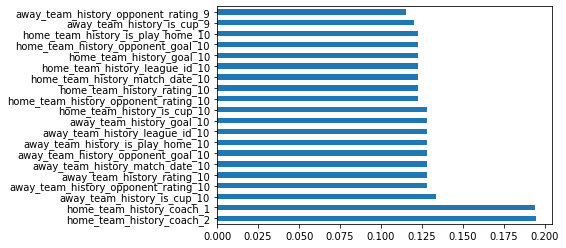

In [59]:
missing_percentages[20:40].plot(kind='barh')


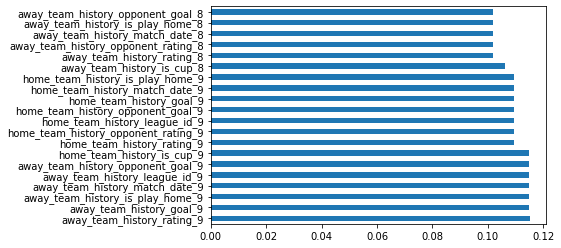

In [60]:
missing_percentages[40:60].plot(kind='barh')


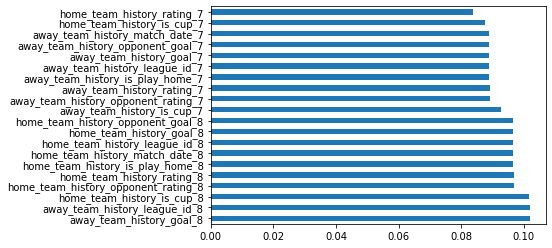

In [61]:
missing_percentages[60:80].plot(kind='barh')


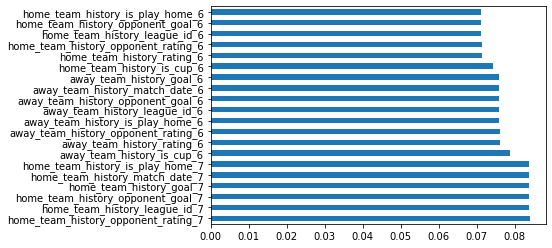

In [62]:
missing_percentages[80:100].plot(kind='barh')


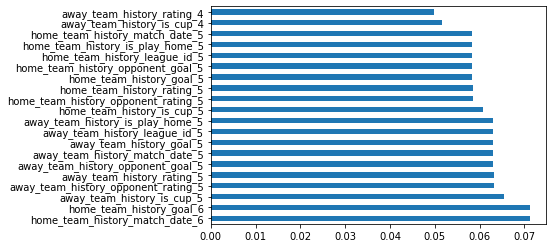

In [63]:
missing_percentages[100:120].plot(kind='barh')


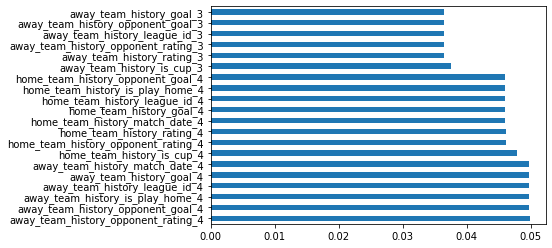

In [64]:
missing_percentages[120:140].plot(kind='barh')


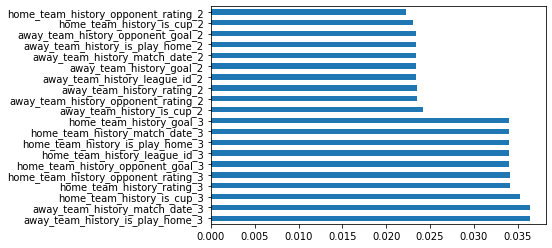

In [65]:
missing_percentages[140:160].plot(kind='barh')


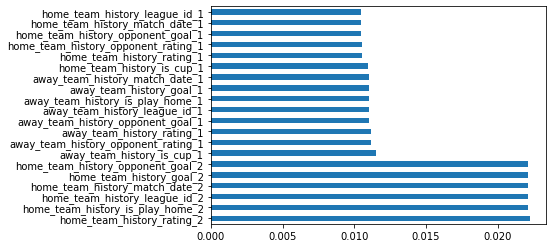

In [66]:
missing_percentages[160:180].plot(kind='barh')


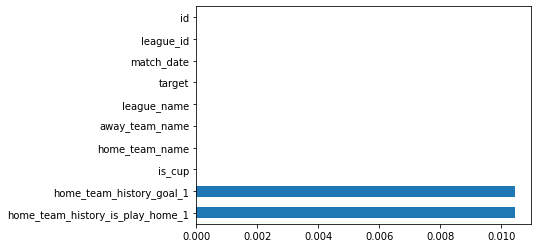

In [67]:
missing_percentages[180:].plot(kind='barh')

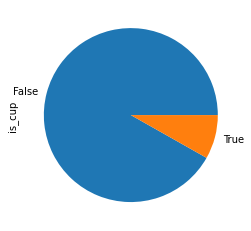

In [68]:
train_file_stream.is_cup.value_counts().plot(kind='pie')

In [79]:
list_of_teams=set(train_file_stream.home_team_name)
list_of_teams=list(list_of_teams)

In [81]:
type(list_of_teams[2])

str

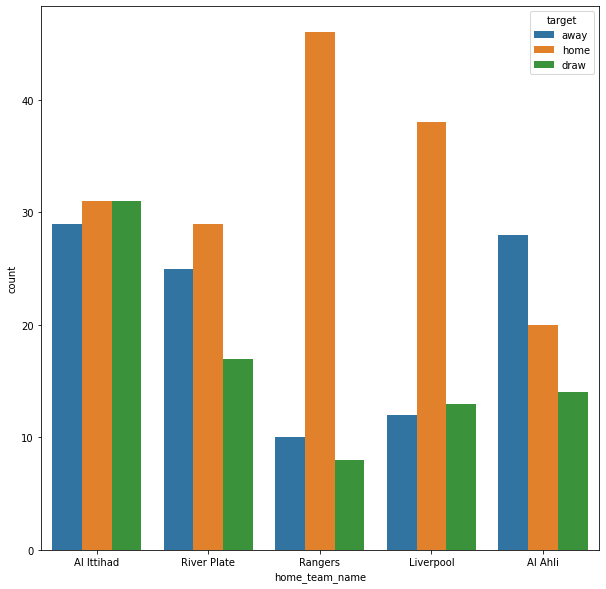

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(x="home_team_name",hue="target",data=train_file_stream,order=train_file_stream.home_team_name.value_counts().iloc[:5].index)

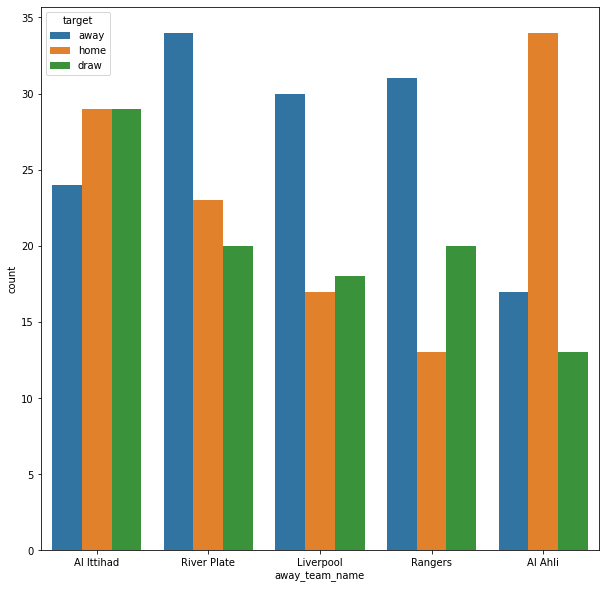

In [83]:
plt.figure(figsize=(10,10))
sns.countplot(x="away_team_name",hue="target",data=train_file_stream,order=train_file_stream.away_team_name.value_counts().iloc[:5].index)

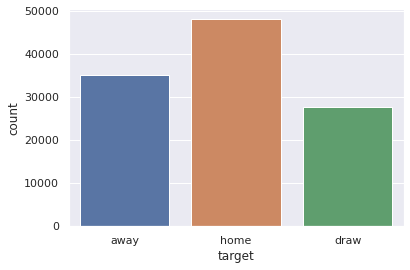

In [85]:
sns.set_theme(style="darkgrid")
sns.countplot(x="target",data=train_file_stream)